# Projet numérique : Câble sous-marin

*Auteurs : Valentin Fenoux et Mathis Boutrouelle*

## Questions théoriques

1. On se sert de la méthode de Monte-Carlo pour approximer la valeur de l'espérance conditionnelle. On suppose que les simulations sont une suite de variables aléatoires indépendantes $(X_n)_{n \in \mathbb{N}^*}$ de même loi et intégrable. Alors : $M_n= \frac{X_1+...+X_n}{n}$ converge presque sûrement vers $E^*$ d'après la loi des grands nombres.

2. On pose le vecteur $\bar{Z} = (Z,Z') = (Z(x_0),...,Z(x_N),Z(x_{j_1}),...,Z(x_{j_n}))$ qui est un vecteur aléatoire gaussien de moyenne $m = (µ,...,µ)$ et de matrice de covariance $\Sigma$ définie positive. Alors d'après le cours Probabilités IV, la densité conditionnelle de Z sachant les profondeurs aux points d'observation est : 
$$f_{Z|Z(x_{j_1})=z(x_{j_1}),...,Z(x_{j_n})=z(x_{j_n})}(y) = \frac{1}{(2\pi)^{\frac{N+1}{2}}\sqrt{\det (C S_Z)}}\exp \left(-\frac{1}{2}\left(y - \psi(y))\right)^t C S_Z^{-1}\left(y - \psi(y))\right)\right)$$
D'où la loi conditionnelle. Avec $C = \begin{pmatrix} \Sigma & C_{Z,Z'} \\ C_{Z',Z} & C_{Z'} \end{pmatrix} \:$ , $\: CS_Z = \Sigma - C_{Z,Z'}C_{Z'}^{-1}C_{Z',Z} \:$ et $\: E[Y|Z=z] = \psi(z) =m_Z + C_{Z,Z'}C_{Z'}^{-1}(z-m_{Z'})$

3. Comme $Y$ est gausssien, on a (p.11 poly Proba V) $Z$ qui est gaussien d'espérance $m$ et de matrice de covariance $C$. De plus comme les $Y_i$ sont des variables aléatoires gaussiennes centrées, réduites et indépendantes, $C = RR^t$

4. - Soient $(U_k,V_k)_{0\leqslant k\leqslant N} \;$ $2(N+1)$ variables aléatoires uniformes indépendantes dans $]0,1[$, simulées avec le module random de python.
   - Alors les $Y_k = \sqrt{-2ln(U_k)}cos(2\pi V_k)$ sont des variables aléatoires gaussiennes centrées réduites.
   - On a alors $Z = \psi(z) + RY$, avec R décomposition de Cholesky de $CS_Z$ pouvant être obtenue grâce à un algorithme, et $CS_Z$ grâce à la fonction décroissante C.

## Implémentation

### Préambule

In [1]:
# Chargement de dépendance

import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Discrétisation

A = 0
B = 500
N = 101
Delta = (B - A)/(N - 1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes*Delta

In [3]:
# Paramètres du modèle

mu = -5
a = 50
sigma2 = 12

In [4]:
# Données

observation_indexes = [0, 20, 40, 60, 80, 100]
depth = np.array([0, -4, -12.8, -1, -6.5, 0])

In [5]:
# Indices des composantes correspondant aux observations et aux composantes non observées

unknown_indexes = list(set(discretization_indexes)-set(observation_indexes))

### Questions

#### 1. Fonction covariance

In [23]:
def cov(H) :
    n= len(H[:,0])
    p= len(H[0])
    C = np.zeros([n,p])
    for i in range(n) :
        for j in range(p):
            C[i,j] = sigma2*np.exp(-H[i,j]/a)
            
    return C

#### 2. Matrice de distance

In [24]:
# Matrice de distance vide
D = np.zeros((N,N))
# Ajout des longueurs
for i,x in enumerate(discretization) :
    for j,y in enumerate(discretization) :
        D[i,j] = abs(x - y)
D

array([[  0.,   5.,  10., ..., 490., 495., 500.],
       [  5.,   0.,   5., ..., 485., 490., 495.],
       [ 10.,   5.,   0., ..., 480., 485., 490.],
       ...,
       [490., 485., 480., ...,   0.,   5.,  10.],
       [495., 490., 485., ...,   5.,   0.,   5.],
       [500., 495., 490., ...,  10.,   5.,   0.]])

#### 3. Matrice de covariance

In [25]:
Cov_Z = cov(D)
Cov_Z

array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        6.65419193e-04, 6.02096185e-04, 5.44799157e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        7.35401941e-04, 6.65419193e-04, 6.02096185e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       ...,
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [6.02096185e-04, 6.65419193e-04, 7.35401941e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [5.44799157e-04, 6.02096185e-04, 6.65419193e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

#### 4. 3 Matrices de covariances

Entre les observations

In [26]:
observation = np.array(observation_indexes)*Delta
# Matrice de distance vide
nb_obs = len(observation_indexes)
D_obs = np.zeros((nb_obs,nb_obs))
# Ajout des longueurs
for i,x in enumerate(observation) :
    for j,y in enumerate(observation) :
        D_obs[i,j] = abs(x - y)

#covariance
Cov_Zobs = cov(D_obs)
Cov_Zobs

array([[1.20000000e+01, 1.62402340e+00, 2.19787667e-01, 2.97450261e-02,
        4.02555153e-03, 5.44799157e-04],
       [1.62402340e+00, 1.20000000e+01, 1.62402340e+00, 2.19787667e-01,
        2.97450261e-02, 4.02555153e-03],
       [2.19787667e-01, 1.62402340e+00, 1.20000000e+01, 1.62402340e+00,
        2.19787667e-01, 2.97450261e-02],
       [2.97450261e-02, 2.19787667e-01, 1.62402340e+00, 1.20000000e+01,
        1.62402340e+00, 2.19787667e-01],
       [4.02555153e-03, 2.97450261e-02, 2.19787667e-01, 1.62402340e+00,
        1.20000000e+01, 1.62402340e+00],
       [5.44799157e-04, 4.02555153e-03, 2.97450261e-02, 2.19787667e-01,
        1.62402340e+00, 1.20000000e+01]])

Entre les observations et les inconnues

In [27]:
#matrice de distance
D_oi = np.zeros((nb_obs,N-nb_obs))
unknown = np.array(unknown_indexes)*Delta
for i,x in enumerate(observation):
    for j,y in enumerate(unknown):
        D_oi[i,j] = abs(x-y)

#covariance
Cov_Zoi = cov(D_oi)
Cov_Zoi

array([[1.08580490e+01, 9.82476904e+00, 8.88981865e+00, 8.04384055e+00,
        7.27836792e+00, 6.58573963e+00, 5.95902365e+00, 5.39194757e+00,
        4.87883592e+00, 4.41455329e+00, 3.99445300e+00, 3.61433054e+00,
        3.27038152e+00, 2.95916357e+00, 2.67756192e+00, 2.42275822e+00,
        2.19220229e+00, 1.98358666e+00, 1.79482343e+00, 1.46947714e+00,
        1.32963790e+00, 1.20310612e+00, 1.08861544e+00, 9.85019983e-01,
        8.91282939e-01, 8.06466153e-01, 7.29720752e-01, 6.60278641e-01,
        5.97444820e-01, 5.40590429e-01, 4.89146448e-01, 4.42598009e-01,
        4.00479240e-01, 3.62368601e-01, 3.27884669e-01, 2.96682318e-01,
        2.68449262e-01, 2.42902937e-01, 1.98872105e-01, 1.79946922e-01,
        1.62822708e-01, 1.47328079e-01, 1.33307958e-01, 1.20622029e-01,
        1.09143325e-01, 9.87569646e-02, 8.93589969e-02, 8.08553640e-02,
        7.31609588e-02, 6.61987730e-02, 5.98991269e-02, 5.41989713e-02,
        4.90412573e-02, 4.43743646e-02, 4.01515855e-02, 3.633065

Entre les inconnues

In [30]:
#matrice de distance
nb_inc = N-nb_obs
D_inc = np.zeros((nb_inc,nb_inc))

for i,x in enumerate(unknown):
    for j,y in enumerate(unknown):
        D_inc[i,j] = abs(x-y)

#covariance
Cov_Zinc = cov(D_inc)
Cov_Zinc

array([[1.20000000e+01, 1.08580490e+01, 9.82476904e+00, ...,
        8.12744838e-04, 7.35401941e-04, 6.65419193e-04],
       [1.08580490e+01, 1.20000000e+01, 1.08580490e+01, ...,
        8.98221959e-04, 8.12744838e-04, 7.35401941e-04],
       [9.82476904e+00, 1.08580490e+01, 1.20000000e+01, ...,
        9.92688787e-04, 8.98221959e-04, 8.12744838e-04],
       ...,
       [8.12744838e-04, 8.98221959e-04, 9.92688787e-04, ...,
        1.20000000e+01, 1.08580490e+01, 9.82476904e+00],
       [7.35401941e-04, 8.12744838e-04, 8.98221959e-04, ...,
        1.08580490e+01, 1.20000000e+01, 1.08580490e+01],
       [6.65419193e-04, 7.35401941e-04, 8.12744838e-04, ...,
        9.82476904e+00, 1.08580490e+01, 1.20000000e+01]])

#### 5. Espérance conditionnelle

On calcule $\: E[Y|Z=z] = \psi(z) =m_Z + C_{Z,Z'}C_{Z'}^{-1}(z-m_{Z'})$, avec $z = depth$

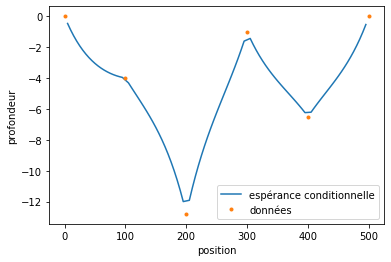

In [69]:
#calcul
m_Zinc = np.ones((nb_inc,1))*mu
m_Zobs = np.ones((nb_obs,1))*mu
Cov_Zio = np.transpose(Cov_Zoi)
Cov_Zobs_inv = np.linalg.inv(Cov_Zobs)
E_cond = m_Zinc + np.dot(np.dot(Cov_Zio,Cov_Zobs_inv), depth.reshape(depth.size,1)-m_Zobs)

#affichage
plt.plot(unknown,E_cond, label='espérance conditionnelle')
plt.plot(observation,depth,'.',label='données')
plt.xlabel('position')
plt.ylabel('profondeur')
plt.legend(loc='lower right')
plt.show()

#### 6. Matrice de covariance conditionnelle

On calcule $\: CS_Z = \Sigma - C_{Z,Z'}C_{Z'}^{-1}C_{Z',Z} \:$

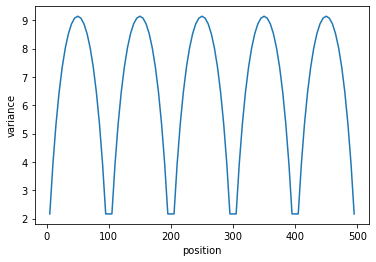

In [71]:
#Calcul
Cov_cond = Cov_Zinc - np.dot(np.dot(Cov_Zio,Cov_Zobs_inv),Cov_Zoi)

#affichage
diag = np.array([Cov_cond[i,i] for i in range(nb_inc)])

plt.plot(unknown,diag)
plt.xlabel('position')
plt.ylabel('variance')
plt.show()

Plus on est loin des points d'observation et plus la variance est grande, car plus l'incertitude sur la profondeur est grande.